# <h1 align="center"> © RsydMathTech. <h1/>

# Statistics Class

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example dataset
data = {
    "drive-wheels": ["fwd", "rwd", "fwd", "4wd", "rwd", "fwd", "4wd", "rwd"],
    "engine-size": [130, 250, 110, 160, 300, 120, 140, 280],
    "price": [15000, 28000, 12000, 20000, 35000, 13000, 18000, 34000]
}

df = pd.DataFrame(data)
df.head()


,drive-wheels,engine-size,price
0,fwd,130,15000
1,rwd,250,28000
2,fwd,110,12000
3,4wd,160,20000
4,rwd,300,35000


## Descriptive Statistics

In [5]:
df.describe()

,engine-size,price
count,8.000000,8.000000
mean,186.250000,21875.000000
std,77.448139,9249.517362
min,110.000000,12000.000000
25%,127.500000,14500.000000
50%,150.000000,19000.000000
75%,257.500000,29500.000000
max,300.000000,35000.000000


## Summarize Categorical Variable

In [7]:
df['drive-wheels'].value_counts()

drive-wheels
fwd    3
rwd    3
4wd    2
Name: count, dtype: int64

## Boxplot for price grouped by drive-wheels

<Figure size 600x400 with 0 Axes>

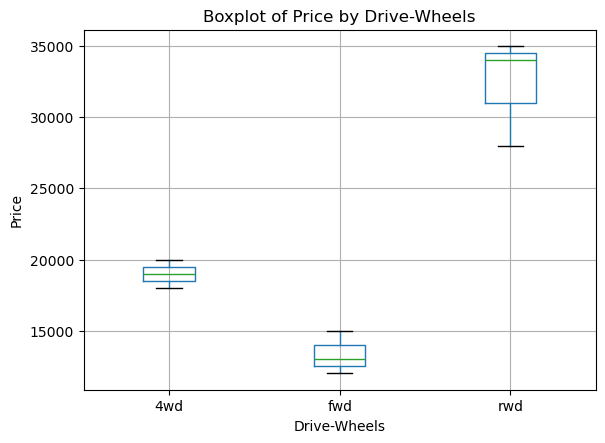

In [8]:
plt.figure(figsize=(6,4))
df.boxplot(column="price", by="drive-wheels")
plt.title("Boxplot of Price by Drive-Wheels")
plt.suptitle("")  # remove default pandas title
plt.xlabel("Drive-Wheels")
plt.ylabel("Price")
plt.show()

## Scatter Plot

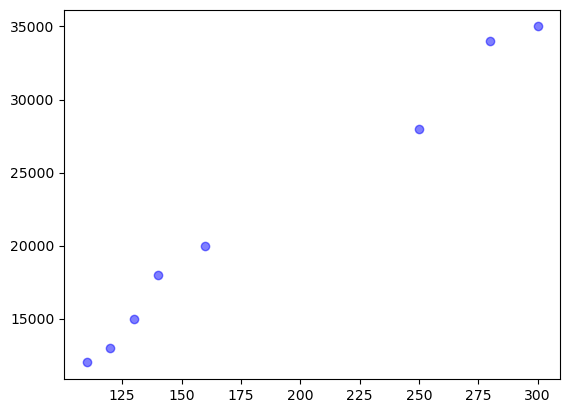

In [9]:
plt.scatter(df["engine-size"], df["price"], color="blue", alpha=0.5)


# Group BY

In [3]:
data = {
    "drive-wheels": ["fwd", "rwd", "fwd", "4wd", "rwd", "fwd", "4wd", "rwd"],
    "engine-size": [130, 250, 110, 160, 300, 120, 140, 280],
    "price": [15000, 28000, 12000, 20000, 35000, 13000, 18000, 34000],
    "body-style": ["sedan", "convertible", "hatchback", "sedan",
                   "hardtop", "wagon", "hatchback", "convertible"]
}

df = pd.DataFrame(data)

df

,drive-wheels,engine-size,price,body-style
0,fwd,130,15000,sedan
1,rwd,250,28000,convertible
2,fwd,110,12000,hatchback
3,4wd,160,20000,sedan
4,rwd,300,35000,hardtop
5,fwd,120,13000,wagon
6,4wd,140,18000,hatchback
7,rwd,280,34000,convertible


In [4]:
df_group = df[['drive-wheels', 'body-style', 'price']]

df

,drive-wheels,engine-size,price,body-style
0,fwd,130,15000,sedan
1,rwd,250,28000,convertible
2,fwd,110,12000,hatchback
3,4wd,160,20000,sedan
4,rwd,300,35000,hardtop
5,fwd,120,13000,wagon
6,4wd,140,18000,hatchback
7,rwd,280,34000,convertible


In [5]:
grouped = df_group.groupby(['drive-wheels', 'body-style'], as_index=False).mean()

grouped

,drive-wheels,body-style,price
0,4wd,hatchback,18000.0
1,4wd,sedan,20000.0
2,fwd,hatchback,12000.0
3,fwd,sedan,15000.0
4,fwd,wagon,13000.0
5,rwd,convertible,31000.0
6,rwd,hardtop,35000.0


In [6]:
pivot = grouped.pivot(index='drive-wheels', columns='body-style', values='price')

pivot

body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,NaN,NaN,18000.0,20000.0,NaN
fwd,NaN,NaN,12000.0,15000.0,13000.0
rwd,31000.0,35000.0,NaN,NaN,NaN


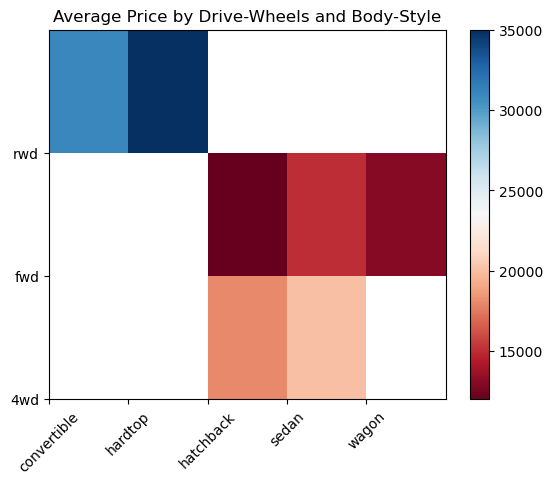

In [7]:
plt.pcolormesh(pivot, cmap='RdBu', shading='auto')
plt.colorbar()
plt.xticks(range(len(pivot.columns)), pivot.columns, rotation=45)
plt.yticks(range(len(pivot.index)), pivot.index)
plt.title("Average Price by Drive-Wheels and Body-Style")
plt.show()
